# Analisando a base de dados de Ramen obtida no Kaggle

In [1]:
#importando as bibliotecas necessárias
import pandas as pd
import matplotlib
import seaborn as sns

In [2]:
#Carregando a base de dados
ramen = 'c:/cursodsz/ramen_ratings.csv'
dataset = pd.read_csv(ramen, sep=',', header=0)

In [3]:
dataset.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [4]:
#Verificando o tipo das variáveis em cada coluna
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [5]:
#A coluna Stars precisa ser modificada para tipo numérico
dataset['Stars'] = dataset['Stars'].replace(['Unrated'], [0.0])
dataset.Stars = dataset.Stars.astype('float64')

In [6]:
#Verificando novamente se o tipo foi alterado
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  2580 non-null   int64  
 1   Brand     2580 non-null   object 
 2   Variety   2580 non-null   object 
 3   Style     2578 non-null   object 
 4   Country   2580 non-null   object 
 5   Stars     2580 non-null   float64
 6   Top Ten   41 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 141.2+ KB


In [7]:
#Trazendo informações estatísticas das colunas numéricas
dataset.describe()

,Review #,Stars
count,2580.000000,2580.000000
mean,1290.500000,3.650426
std,744.926171,1.022358
min,1.000000,0.000000
25%,645.750000,3.250000
50%,1290.500000,3.750000
75%,1935.250000,4.250000
max,2580.000000,5.000000


In [8]:
#Verificando a marca mais consumida de Ramen
pd.value_counts(dataset['Brand'])

Nissin               381
Nongshim              98
Maruchan              76
Mama                  71
Paldo                 66
                    ... 
New Way                1
Sakurai                1
Tokachimen Koubou      1
Unzen                  1
Unif Tung-I            1
Name: Brand, Length: 355, dtype: int64

In [9]:
dataset.isnull().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

<IPython.core.display.Javascript object>


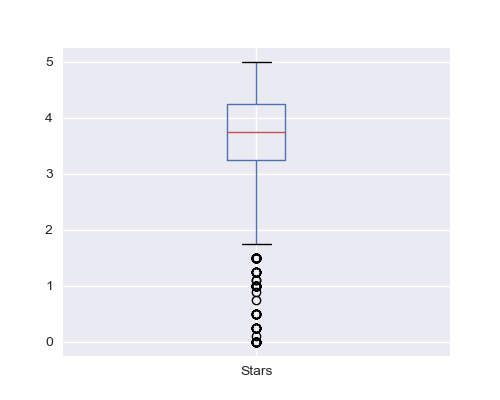

In [11]:
#Visualizado a distribuição da coluna Stars e outliers
%matplotlib notebook
matplotlib.style.use('seaborn')
dataset.boxplot(column='Stars', figsize=(5, 4));

<IPython.core.display.Javascript object>


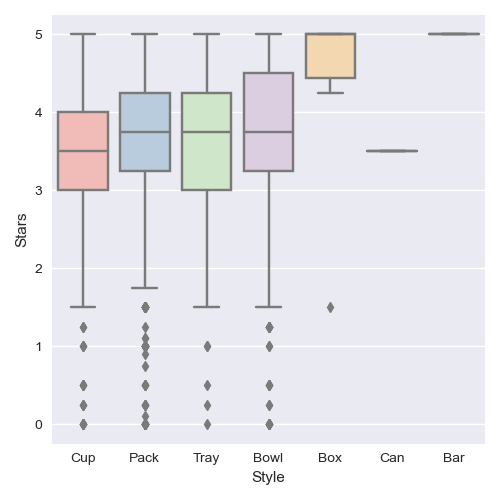

In [12]:
#Visualizando a distribuição de estrelas por estilo de Ramen
%matplotlib notebook
sns.catplot(x="Style", y='Stars', kind='box', palette='Pastel1', data=dataset);